**Feature Engineering Notebook Two: Feature Selection**  
*Author: Yingxiang Chen, Zihan Yang*

**Reference**
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://machinelearningmastery.com/an-introduction-to-feature-selection/
- https://dcor.readthedocs.io/en/latest/functions/dcor.independence.distance_covariance_test.html
- https://en.wikipedia.org/wiki/Distance_correlation
- https://stats.stackexchange.com/questions/56881/whats-the-relationship-between-r2-and-f-test
- https://en.wikipedia.org/wiki/Mutual_information
- https://libguides.library.kent.edu/SPSS/ChiSquare
- https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/
- https://online.stat.psu.edu/stat414/node/218/
- http://featureselection.asu.edu/algorithms.php
- https://en.wikipedia.org/wiki/Minimum_redundancy_feature_selection
- Peng, H., Long, F., & Ding, C. (2005). Feature selection based on mutual information: criteria of max-dependency, max-relevance, and min-redundancy. IEEE Transactions on Pattern Analysis & Machine Intelligence, (8), 1226-1238.
- Hall, M. A., & Smith, L. A. (1999, May). Feature selection for machine learning: comparing a correlation-based filter approach to the wrapper. In FLAIRS conference (Vol. 1999, pp. 235-239).
- Yu, L., & Liu, H. (2003). Feature selection for high-dimensional data: A fast correlation-based filter solution. In Proceedings of the 20th international conference on machine learning (ICML-03) (pp. 856-863).
- Zhao, Z., & Liu, H. (2007, June). Spectral feature selection for supervised and unsupervised learning. In Proceedings of the 24th international conference on Machine learning (pp. 1151-1157). ACM.
- Robnik-Šikonja, M., & Kononenko, I. (2003). Theoretical and empirical analysis of ReliefF and RReliefF. Machine learning, 53(1-2), 23-69.
- https://machinelearningmastery.com/an-introduction-to-feature-selection/
- http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
- https://cloud.tencent.com/developer/article/1087796 [Chinese]

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filter-Methods" data-toc-modified-id="Filter-Methods-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Univariate-Filter-Methods" data-toc-modified-id="Univariate-Filter-Methods-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Univariate Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Variance-Threshold" data-toc-modified-id="Variance-Threshold-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Variance Threshold</a></span></li><li><span><a href="#Pearson-Correlation-(regression-problem)" data-toc-modified-id="Pearson-Correlation-(regression-problem)-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Pearson Correlation (regression problem)</a></span></li><li><span><a href="#Distance-Correlation-(regression-problem)" data-toc-modified-id="Distance-Correlation-(regression-problem)-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Distance Correlation (regression problem)</a></span></li><li><span><a href="#F-Score-(regression-problem)" data-toc-modified-id="F-Score-(regression-problem)-1.1.1.4"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>F-Score (regression problem)</a></span></li><li><span><a href="#Mutual-Information-(regression-problem)" data-toc-modified-id="Mutual-Information-(regression-problem)-1.1.1.5"><span class="toc-item-num">1.1.1.5&nbsp;&nbsp;</span>Mutual Information (regression problem)</a></span></li><li><span><a href="#Chi-squared-Statistics-(classification-problem)" data-toc-modified-id="Chi-squared-Statistics-(classification-problem)-1.1.1.6"><span class="toc-item-num">1.1.1.6&nbsp;&nbsp;</span>Chi-squared Statistics (classification problem)</a></span></li><li><span><a href="#F-Score-(classification-problem)" data-toc-modified-id="F-Score-(classification-problem)-1.1.1.7"><span class="toc-item-num">1.1.1.7&nbsp;&nbsp;</span>F-Score (classification problem)</a></span></li><li><span><a href="#Mutual-Information-(classification-problem)" data-toc-modified-id="Mutual-Information-(classification-problem)-1.1.1.8"><span class="toc-item-num">1.1.1.8&nbsp;&nbsp;</span>Mutual Information (classification problem)</a></span></li></ul></li><li><span><a href="#Multivariate-Filter-Methods" data-toc-modified-id="Multivariate-Filter-Methods-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Multivariate Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Max-Relevance-Min-Redundancy-(mRMR)" data-toc-modified-id="Max-Relevance-Min-Redundancy-(mRMR)-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Max-Relevance Min-Redundancy (mRMR)</a></span></li><li><span><a href="#Correlation-based-Feature-Selection-(CFS)" data-toc-modified-id="Correlation-based-Feature-Selection-(CFS)-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Correlation-based Feature Selection (CFS)</a></span></li><li><span><a href="#Fast-Correlation-based-Filter-(FCBF)" data-toc-modified-id="Fast-Correlation-based-Filter-(FCBF)-1.1.2.3"><span class="toc-item-num">1.1.2.3&nbsp;&nbsp;</span>Fast Correlation-based Filter (FCBF)</a></span></li><li><span><a href="#ReliefF" data-toc-modified-id="ReliefF-1.1.2.4"><span class="toc-item-num">1.1.2.4&nbsp;&nbsp;</span>ReliefF</a></span></li><li><span><a href="#Spectral-Feature-Selection-(SPEC)" data-toc-modified-id="Spectral-Feature-Selection-(SPEC)-1.1.2.5"><span class="toc-item-num">1.1.2.5&nbsp;&nbsp;</span>Spectral Feature Selection (SPEC)</a></span></li></ul></li></ul></li><li><span><a href="#Wrapper-Methods" data-toc-modified-id="Wrapper-Methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Wrapper Methods</a></span><ul class="toc-item"><li><span><a href="#Deterministic-Algorithms" data-toc-modified-id="Deterministic-Algorithms-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Deterministic Algorithms</a></span><ul class="toc-item"><li><span><a href="#Recursive-Feature-Elimination-(SBS)" data-toc-modified-id="Recursive-Feature-Elimination-(SBS)-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Recursive Feature Elimination (SBS)</a></span></li></ul></li><li><span><a href="#Randomized-Algorithms" data-toc-modified-id="Randomized-Algorithms-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Randomized Algorithms</a></span><ul class="toc-item"><li><span><a href="#Simulated-Annealing-(SA)" data-toc-modified-id="Simulated-Annealing-(SA)-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Simulated Annealing (SA)</a></span></li><li><span><a href="#Genetic-Algorithm-(GA)" data-toc-modified-id="Genetic-Algorithm-(GA)-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Genetic Algorithm (GA)</a></span></li></ul></li></ul></li><li><span><a href="#Embedded-Methods" data-toc-modified-id="Embedded-Methods-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Embedded Methods</a></span><ul class="toc-item"><li><span><a href="#Regulization-Based-Methods" data-toc-modified-id="Regulization-Based-Methods-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Regulization Based Methods</a></span><ul class="toc-item"><li><span><a href="#Lasso-Regression-(Linear-Regression-with-L1-Norm)" data-toc-modified-id="Lasso-Regression-(Linear-Regression-with-L1-Norm)-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Lasso Regression (Linear Regression with L1 Norm)</a></span></li><li><span><a href="#Logistic-Regression-(with-L1-Norm)" data-toc-modified-id="Logistic-Regression-(with-L1-Norm)-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Logistic Regression (with L1 Norm)</a></span></li><li><span><a href="#LinearSVR/-LinearSVC" data-toc-modified-id="LinearSVR/-LinearSVC-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>LinearSVR/ LinearSVC</a></span></li></ul></li><li><span><a href="#Tree-Based-Methods" data-toc-modified-id="Tree-Based-Methods-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Tree Based Methods</a></span></li></ul></li></ul></li></ul></div>

# Feature Selection

After data preprocessing, we have generated a large number of new variables (recall by one-hot encoding, a large number of variables are generated and contain only 0 or 1). But in fact, some of the newly generated variables may be redundant. On the one hand, they might not contain any useful information and therefore cannot improve model performance. On the other hand, these extra variables will consume a lot of memory and computing power when building the model. Therefore, we should perform feature selection and select a subset of features for modeling.

## Filter Methods

The filter method uses some statistics measures or hypothesis test results to assign scores to each feature. Features with higher scores tend to be more important and should be included in the subsets. Below is a sample ML pipeline based on train-validation-testset split method.

![image](./images/Filter_Pipeline.png)

### Univariate Filter Methods

Univariate filter methods select the best feature based on univariate statistical tests. It considers the feature independently or with regard to the target variable only.

#### Variance Threshold

The variance approach simply removes all the features that have variance below a certain threshold. For example, a feature with zero variance (features that have the same value in all observations) should be removed because this feature can not examine any variance in the target variance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# create some synthesized dataset
train_set = np.array([[1,2,3],[1,4,7],[1,4,9]]) # the first feature have zero variance
# array([[1, 2, 3],
#        [1, 4, 7],
#        [1, 4, 9]])

test_set = np.array([[3,2,3],[1,2,7]]) # the second feature have zero variance
# array([[3, 2, 3],
#        [1, 2, 7]])

selector = VarianceThreshold()
selector.fit(train_set) # fit on trainset
transformed_train = selector.transform(train_set) # transform train set
# the first feature has been removed
# array([[2, 3],
#        [4, 7],
#        [4, 9]])

transformed_test = selector.transform(test_set) # transform test set
# array([[2, 3],
#        [2, 7]])
# although in the test set the second features has zero variance
# but according to train set, we should remove the first feature only

#### Pearson Correlation (regression problem)

Pearson Correlation is generally used to measure the linear correlection between two **continuous** features. It can also measure the linear correlation between binary features and the target variable. And the categorical variable can be converted into binary features by one-hot encoding.   

Formula:  
  
$r = \frac{\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{(X_i-\bar{X})^2}\sqrt{(Y_i-\bar{Y})^2}}$

In [2]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example
# in this dataset, both X and y are continuous, so we can use Pearson Correlation to select features

# use the first 15000 obs as train_set
# the rest obs as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# there is no pre-built Pearson function in sklearn
# we need to use scipy.stats.pearsonr (can only compute the pearsonr between two features) 
# to create a multivariate version of Pearson function that can be used in SelectKBest

def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T]) # list of (pearsonr, p-value)
    return np.absolute(result[:,0]), result[:,1] 

selector = SelectKBest(udf_pearsonr, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset
transformed_train = selector.transform(train_set) # transform trainset
transformed_train.shape #(15000, 2), select the 1st and 7th features
assert np.array_equal(transformed_train, train_set[:,[0,6]]) 

transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_test, test_set[:,[0,6]]);
# the 1st and 7th features are selected

In [3]:
# validate the result
for idx in range(train_set.shape[1]):
    pea_score, p_value = pearsonr(train_set[:,idx], train_y)
    print(f"The absolute value of the correlation between the {idx + 1} feature and target is {round(np.abs(pea_score),2)},p-value is {round(p_value,3)}")
# so we should select the 1st and 7th features

The absolute value of the correlation between the 1 feature and target is 0.7,p-value is 0.0
The absolute value of the correlation between the 2 feature and target is 0.07,p-value is 0.0
The absolute value of the correlation between the 3 feature and target is 0.14,p-value is 0.0
The absolute value of the correlation between the 4 feature and target is 0.04,p-value is 0.0
The absolute value of the correlation between the 5 feature and target is 0.02,p-value is 0.011
The absolute value of the correlation between the 6 feature and target is 0.05,p-value is 0.0
The absolute value of the correlation between the 7 feature and target is 0.23,p-value is 0.0
The absolute value of the correlation between the 8 feature and target is 0.08,p-value is 0.0


#### Distance Correlation (regression problem)

Distance correlation measures the dependence between two continuous features. Unlike the Pearson correlation, distance correlation measures both linear and nonlinear relationships between two variables.

Formula:  
  
Firstly, compute the (n x n) distance matrices dX with $dX_{ij}$ as elements and dY with $dY_{ij}$ as elementns containing all pairwise distances. $dX_{ij}$ is the distance between observation i and observation j:    
  
$dX_{ij} = \left \| X_i - X_j \right \|$  
$dY_{ij} = \left \| Y_i - Y_j \right \|$
  
Secondly, we calculate the doubly centered distances as below and update the distance matrices. $\bar{X_i}$ is the i-th row mean of distance matrices dX, $\bar{X_j}$ the j-th column mean of distance matrices dX, $\sum_i^N \sum_j^N dX_{ij}$ is the grand mean.
  
$dX_{ij} = dX_{ij} - \bar{X_i} - \bar{X_j} + \frac{1}{N^2} \sum_i^N \sum_j^N dX_{ij}$  
$dY_{ij} = dY_{ij} - \bar{Y_i} - \bar{Y_j} + \frac{1}{N^2} \sum_i^N \sum_j^N dY_{ij}$   
  
Then, we compute the sample distance covariance/ variance as below:  
  
$dCov^2 (X, Y) = \frac{1}{N^2} \sum_{i}^{N} \sum_{j}^{N} dX_{ij}dY_{ij}$  
$dVar^2(X) = Cov^2_D (X, X)$  

Finally, the distance correlation $dCor(X,Y)$ is as below:  
  
$dCor(X,Y) = \frac{dCov_D(X, Y)}{\sqrt{dVar^2(X)}\sqrt{dVar^2(Y)} }$

In [4]:
from dcor import distance_correlation
from dcor.independence import distance_covariance_test
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example
# in this dataset, both X and y are continuous, so we can use distance Correlation to select features

# use the first 15000 obs as train_set
# the rest obs as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# there is no pre-built Distance Correlation function in sklearn
# we need to use dcor.distance_correlation (can only compute the distance_correlation between two features) 
# to create a multivariate version of distance_correlation function that can be used in SelectKBest

def udf_dcorr(X, y):
    result = np.array([[distance_correlation(x, y), 
                        distance_covariance_test(x,y)[0]]for x in X.T]) # list of (pearsonr, p-value)
    return result[:,0], result[:,1]

selector = SelectKBest(udf_dcorr, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset
transformed_train = selector.transform(train_set) # transform trainset 
transformed_train.shape #(15000, 2), select the 1st and 3rd features
assert np.array_equal(transformed_train, train_set[:,[0,2]])

transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_test, test_set[:,[0,2]]);
# the 1st and 3rd features are selected

In [5]:
# validate the result
for idx in range(train_set.shape[1]):
    d_score = distance_correlation(train_set[:,idx], train_y)
    p_value = distance_covariance_test(train_set[:,idx], train_y)[0]
    print(f"The d-correlation between the {idx + 1} feature and target is {round(d_score,2)}, p-value is {round(p_value,3)}")
# so we should select the 1st and 3rd features

The d-correlation between the 1 feature and target is 0.66, p-value is 1.0
The d-correlation between the 2 feature and target is 0.07, p-value is 1.0
The d-correlation between the 3 feature and target is 0.31, p-value is 1.0
The d-correlation between the 4 feature and target is 0.12, p-value is 1.0
The d-correlation between the 5 feature and target is 0.08, p-value is 1.0
The d-correlation between the 6 feature and target is 0.29, p-value is 1.0
The d-correlation between the 7 feature and target is 0.25, p-value is 1.0
The d-correlation between the 8 feature and target is 0.19, p-value is 1.0


#### F-Score (regression problem)

The F-Score reports whether any of the independent variables in a linear regression model are significant. Specifically, suppose we have p features, we construct p univariate linear regression for each feature separately, each regress the target variable with the i-th feature and a constant only. Then we can report the F-Score of each linear model which captures the linear relationship between the ith feature and the target variable. The null hypothesis for F-Score is that the feature is not related to the target variable. So we should select features that have higher F-Score (more likely to reject the null hypothesis).

Formula:  

$F = \frac{(SST - SSR)/(p - 1)}{SSR/(n - p)} =  \frac{SST - SSR}{SSR/(n - 2)} =  \frac{R^2}{(1 - R^2)(n - 2)} = \frac{\rho ^2}{(1 - \rho ^2)(n - 2)}$  
  
where:  

$SST = \sum_{i=1}^{n}(y_i - \overline{y}) ^2$  
  
$\overline{y} = \frac{1}{n} \sum_{i=1}^{n}y_i$  
  
$SSR = \sum_{i=1}^{n}(\widehat{y}_i - \overline{y})^2$  
  
$\widehat{y}_i$ is the predicted value by the model
  
SST is the total sum of squares, SSR is the residual sum of squares, p is the number of predictors (including the constant, so p = 2 in our case), $\rho$ is the correlation coefficient between feature i and the target variable and n is the number of observations. Since in the linear model, there is only one non-constant variable, so $\rho^2 = R^2$.

In [6]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example
# in this dataset, both X and y are continuous, so we can use F-score to select features

# use the first 15000 obs as train_set
# the rest obs as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# use pre-built f-score function in sklearn

selector = SelectKBest(f_regression, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset 
transformed_train = selector.transform(train_set) # transform trainset
transformed_train.shape #(15000, 2), select the 1st and 7th features
assert np.array_equal(transformed_train, train_set[:,[0,6]]) 

transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_test, test_set[:,[0,6]]);
# the 1st and 7th features are selected

In [7]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = f_regression(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The F-Score between the {idx + 1} feature and target is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 1st and 7th features

The F-Score between the 1 feature and target is 14111.79, p-value is 0.0
The F-Score between the 2 feature and target is 71.99, p-value is 0.0
The F-Score between the 3 feature and target is 317.04, p-value is 0.0
The F-Score between the 4 feature and target is 23.93, p-value is 0.0
The F-Score between the 5 feature and target is 6.54, p-value is 0.011
The F-Score between the 6 feature and target is 35.93, p-value is 0.0
The F-Score between the 7 feature and target is 846.61, p-value is 0.0
The F-Score between the 8 feature and target is 98.06, p-value is 0.0


#### Mutual Information (regression problem)

Mutual information measures the dependency between the two variables, that is, the reduction in entropy after knowing the information of another variable.   

MI is equal to zero if and only if two random variables are independent, and higher values reflect higher dependency. Compared with Pearson correlation & F-Score, it also captures non-linear relationships.

Formula:  
  
- For discrete distributions (for both x and y):  
  
    $I(x, y) = H(Y) - H(Y|X) = \sum_{x\in \mathit{X}}  \sum_{x\in \mathit{Y}} \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)})$  

    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability mass function (PMF) of x and y, $\textit{p}_{X}(x)$ is the PMF of x.  
  
- For continuous distributions (for both x and y):  

    $I(X, Y) = H(Y) - H(Y|X) = \int_X \int_Y  \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)}) \, \, dx dy$  
    
    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability density function (PDF) of x and y, $\textit{p}_{X}(x)$ is the PDF of x.  
  
  
But in reality, is it likely that one of x and y is discrete variable and the another is continuous variable. So in sklearn, it implement the nonparametric methods based on entropy estimation from k-nearest neighbors distances proposed in [1] and [2].  
  
  
[1] A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.  
[2] B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014. 

In [8]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example
# in this dataset, both X and y are continuous, so we can use MI to select features

# use the first 15000 obs as train_set
# the rest obs as test_set
train_set = X[0:15000,:].astype(float)
test_set = X[15000:,].astype(float)
train_y = y[0:15000].astype(float)

# since n_neighbors in the KNN is also a very important parameters
# so we write a new MI function function based on pre-built MI function in sklearn
# to allow more flexibility

def udf_MI(X, y):
    result = mutual_info_regression(X, y, n_neighbors = 5) # user_defined n_neighbors
    return result

selector = SelectKBest(udf_MI, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset
transformed_train = selector.transform(train_set) # transform trainset
transformed_train.shape #(15000, 2), select the 1st and 8th features
assert np.array_equal(transformed_train, train_set[:,[0,7]]) # return True

transformed_test = selector.transform(test_set) # transform test set
assert np.array_equal(transformed_test, test_set[:,[0,7]]);
# the 1st and 8th features are selected

In [9]:
# validate the result
for idx in range(train_set.shape[1]):
    score = mutual_info_regression(train_set[:,idx].reshape(-1,1), train_y, n_neighbors = 5)
    print(f"The MI between the {idx + 1} feature and target is {round(score[0],2)}")
# so we should select the 1st and 8th features

The MI between the 1 feature and target is 0.37
The MI between the 2 feature and target is 0.03
The MI between the 3 feature and target is 0.1
The MI between the 4 feature and target is 0.03
The MI between the 5 feature and target is 0.02
The MI between the 6 feature and target is 0.09
The MI between the 7 feature and target is 0.37
The MI between the 8 feature and target is 0.46


#### Chi-squared Statistics (classification problem)

Chi-Square Statistic determines whether there is a relationship between categorical variables. Sklearn provides chi2 function to calculate Chi-square. The input of this function should be booleans or frequencies. The null hypothesis is that two variables are independent, so the higher the chi-square, the higher the probability that the two variables are correlated, so we should select features that have higher chi-square scores.

Formula:  
  
$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{i,j} - E_{i,j})^2}{E_{i,j}} = n \sum_{i,j} p_ip_j(\frac{\frac{O_{i,j}}{n} - p_i p_j}{p_i p_j})^2$  
  
$O_{i,j}$ is the number of observations that have the i-th category value in feature X and
the j-th category value in feature Y. $E_{i,j}$ is the expected number of observations that have the i-th category value in feature X and
the j-th category value in feature Y. n is the number of observations in the dataset. $p_i$ is the probability of having the i-th category value in feature X, $p_j $ is the probability of having the j-th category value in feature Y.  
 
**We did some research on the original source code of sklearn. And we figure out that in fact, the chi-square statistic calculated using chi2 function in sklearn is not the real Chi-square statistic**. When the input feature is a boolean feature, the value calculated by chi2 function only considers the situation when the feature value is True (we will elaborate this later). This has the advantage that the sum of the output calculated by the chi2 equation for all the boolean variables generated by one-hot encoding will equal to the chi-square statistics of the original variable.  
  
For example, suppose a variable I has three possible categorical values: 0, 1, and 2. After the one-hot encoding, three new boolean variables will be generated. The sum of the chi2 function output of these three boolean variables equals the chi-square statistics calculated directly between the original variable I and the dependent variable.

##### Explain how sklearn calculate chi2

In [10]:
# generate a dataset
import pandas as pd
sample_dict = {'Type': ['J','J','J',
                        'B','B','B',
                        'C','C','C','C','C'], 
               'Output': [0, 1, 0, 
                          2, 0, 1,  
                          0, 0, 1, 2, 2,]}
sample_raw = pd.DataFrame(sample_dict)
sample_raw # raw data, `output` is our target variable, `Type` is the input features

,Type,Output
0,J,0
1,J,1
2,J,0
3,B,2
4,B,0
5,B,1
6,C,0
7,C,0
8,C,1
9,C,2


In [11]:
# one-hot encoding the dataset and generate boolean variable
# use sklearn chi2 to calculate chi2 value for each boolean variables

sample = pd.get_dummies(sample_raw)
from sklearn.feature_selection import chi2
chi2(sample.values[:,[1,2,3]],sample.values[:,[0]])
# the first row is the chi2 value for each boolean variables

(array([0.17777778, 0.42666667, 1.15555556]),
 array([0.91494723, 0.8078868 , 0.56114397]))

In [12]:
# now calculate the chi2 between original feature `Type` and target variable `Output`
# calculate the contingency table first
obs_df = sample_raw.groupby(['Type','Output']).size().reset_index()
obs_df.columns = ['Type','Output','Count']
obs_df

,Type,Output,Count
0,B,0,1
1,B,1,1
2,B,2,1
3,C,0,2
4,C,1,1
5,C,2,2
6,J,0,2
7,J,1,1


So the contingency table is as below:

| Type/Output | 0 | 1 | 2 |
|------|------|------|------|
|  B  | 1 | 1 | 1 |
|  C  | 2 | 1 | 2 |
|  J  | 2 | 1 | 0 |

In [13]:
import numpy as np
from scipy.stats import chi2_contingency
obs = np.array([[1, 1, 1], [2, 1, 2],[2, 1, 0]])
chi2_contingency(obs) # the first value is the chi2 stats between the orginal feature
# and the target variable

(1.7600000000000002,
 0.779791873961373,
 4,
 array([[1.36363636, 0.81818182, 0.81818182],
        [2.27272727, 1.36363636, 1.36363636],
        [1.36363636, 0.81818182, 0.81818182]]))

In [14]:
# the sum of the sklearn.chi2 results equal to the chi-square stats between the orginal feature
# and the target variable

chi2(sample.values[:,[1,2,3]],sample.values[:,[0]])[0].sum() == chi2_contingency(obs)[0]

True

In [15]:
# then how the chi2 is calcualted in sklearn?
# take the first result 0.17777778 as an example
# this is the chi2 value sklearn calculated for Type B boolean variable
# this value 0.17777778 is the same as the result from the below code

from scipy.stats import chisquare
f_exp = np.array([5/11, 3/11, 3/11]) * 3 # expected occurance = the prior prob of output variable * the numebr of obs in B Type
chisquare([1,1,1], f_exp=f_exp) # [1,1,1] is the actual occurance of obs in B Type

# so the chi2 function in sklearn only considers the obs in B Type

Power_divergenceResult(statistic=0.17777777777777778, pvalue=0.9149472287300311)

How to use sklearn chi2 function for feature selection

In [16]:
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# load the dataset
from sklearn.datasets import load_iris # use iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# in this dataset, X is continuous variable, y is categorical variable
# does not meet the chi2 requirement 

# convert to categorical data by converting data to booleans
# as demo, convert continuous variable to booleans by whether the value is greater than mean
X = X > X.mean(0)

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 obs as train_set
# the rest 50 obs as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# use pre-built chi-squared function in sklearn
selector = SelectKBest(chi2, k=2) # # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset 
transformed_train = selector.transform(train_set) # transform trainset
transformed_train.shape #(100, 2), select the 3rd and 4th features
assert np.array_equal(transformed_train, train_set[:,[2,3]]) 

transformed_test = selector.transform(test_set) # transform test set
assert np.array_equal(transformed_test, test_set[:,[2,3]]);
# select the 3rd and 4th features

In [17]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = chi2(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The ch2 statistics between the {idx + 1} feature and target is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 3rd and 4th features 

The ch2 statistics between the 1 feature and target is 29.69, p-value is 0.0
The ch2 statistics between the 2 feature and target is 19.42, p-value is 0.0
The ch2 statistics between the 3 feature and target is 31.97, p-value is 0.0
The ch2 statistics between the 4 feature and target is 31.71, p-value is 0.0


#### F-Score (classification problem)

In classification tasks, if the features are categorical, then we can use the chi-square statistic to select the top features. However, if features are continuous, then we should use ANOVA F-value. The ANOVA F-value scores examine if we group the numerical feature by the target variable (category), the population means for each group are significantly different. The null hypothesis is that these mean are the same. So we should select features output higher F-Score since higher F-Score means that we should reject the hypothesis therefore features with higher F-Score are more related to the target variable.

Formula:  
  
$F = \frac{MSB}{MSE} = \frac{ \frac{SS(between)}{m-1}}{ \frac{SS(error)}{n-m}}$  
  
Where SS(between) is the Sum of Squares between the groups, specifically the sum of squares between the group means and the grand mean. SS(error) is the Sum of Squares within the groups, specifically sum of squares between the data and the group means. m is the number of groups compared, n is the number of observations.

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# in this dataset, X is continuous variable, y is categorical, so we can use 
# ANOVA-F score to select features

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 obs as train_set
# the rest 50 obs as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# use pre-built f-score function in sklearn
selector = SelectKBest(f_classif, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on train set
transformed_train = selector.transform(train_set) # transform train set
transformed_train.shape #(100, 2), select the 3rd and 4th features
assert np.array_equal(transformed_train, train_set[:,[2,3]]) # return True

transformed_test = selector.transform(test_set) # transform test set
assert np.array_equal(transformed_test, test_set[:,[2,3]]);
# select the 3rd and 4th features

In [19]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = f_classif(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The ANOVA F-Score between the {idx + 1} feature and target is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 3rd and 4th features 

The ANOVA F-Score between the 1 feature and target is 91.39, p-value is 0.0
The ANOVA F-Score between the 2 feature and target is 33.18, p-value is 0.0
The ANOVA F-Score between the 3 feature and target is 733.94, p-value is 0.0
The ANOVA F-Score between the 4 feature and target is 608.95, p-value is 0.0


#### Mutual Information (classification problem)

Mutual information measures the dependency between the two variables. MI is equal to zero if and only if two random variables are independent, and higher values reflect higher dependency. Compared with Pearson correlation & F-Score, it also captures the non-linear relationships.

Formula (the same as 1.1.1.5):  
  
- For discrete distributions (for both x and y):  
  
    $I(x, y) = \sum_{x\in \mathit{X}}  \sum_{x\in \mathit{Y}} \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)})$  

    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability mass function (PMF) of x and y, $\textit{p}_{X}(x)$ is the PMF of x.  
  
- For continuous distributions (for both x and y):  

    $I(X, Y) = \int_X \int_Y  \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)}) \, \, dx dy$  
    
    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability density function (PDF) of x and y, $\textit{p}_{X}(x)$ is the PDF of x.  
  
  
But in reality, is it likely that one of x and y is discrete variable and the another is continuous variable. So in sklearn, it implement the nonparametric methods based on entropy estimation from k-nearest neighbors distances proposed in [1] and [2].  
  
  
[1] A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.  
[2] B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014. 

In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# in this dataset, X is continuous variable, y is categorical, so we can use 
# MI to select features

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 100 observations as test_set
train_set = X[0:100,:].astype(float)
test_set = X[100:,].astype(float)
train_y = y[0:100].astype(float)

# since n_neighbors in the KNN is also a very important parameters
# so we write a new MI function function based on pre-built MI function in sklearn
# to allow more flexibility

def udf_MI(X, y):
    result = mutual_info_classif(X, y, n_neighbors = 5) # user_defined n_neighbors
    return result

selector = SelectKBest(f_classif, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on the trainset
transformed_train = selector.transform(train_set) # transform train set
transformed_train.shape #(100, 2), select the 3rd and 4th features
assert np.array_equal(transformed_train, train_set[:,[2,3]]) # return True

transformed_test = selector.transform(test_set) # transform test set
assert np.array_equal(transformed_test, test_set[:,[2,3]]);
# so we should select the 3rd and 4th features 

In [21]:
# validate the result
for idx in range(train_set.shape[1]):
    score = mutual_info_classif(train_set[:,idx].reshape(-1,1), train_y, n_neighbors = 5)
    print(f"The MI between the {idx + 1} feature and target is {round(score[0],2)}")
# so we should select the 3rd and 4th features

The MI between the 1 feature and target is 0.54
The MI between the 2 feature and target is 0.28
The MI between the 3 feature and target is 0.99
The MI between the 4 feature and target is 1.01


### Multivariate Filter Methods

Compared with Univariate Filter Methods, Multivariate filter methods select the best feature based on the entire feature space. The relationships between features are taken into account so it performs better in removing redundant features. Here utilize the [skfeature](https://github.com/jundongl/scikit-feature) module developed by Arizona State University.

#### Max-Relevance Min-Redundancy (mRMR) 

The mRMR method tries to find a subset of features that have a higher association (MI) with the target variable while at the same time have lower inter-association with all the features already in the subset. We did some research on the source code, we figure out that  the implementation of mRMR in skfeature only works for discrete features in the classification problems since it uses discrete Mutual Information formula during the calculation.

Formula:  

Assuming dataset contains m features, the n-th feature importance based on the mRMR criterion for feature $X_i$ can be expressed as:  
  
$f^{mRMR}(X_i) = I(Y, X_i) - \frac{1}{|S|}\sum_{X_s \in S} I(X_s, X_i)$  

$I(Y, X_i)$ is the MI between feature $X_i$ and target variable. $\frac{1}{|S|}\sum_{X_s \in S} I(X_s, X_i)$ is the average MI between feature $X_i$ and all the features already in the subset.  

mRMR is a step-wise method, at each step, the feature $X_i, (X_i \notin  S)$ with the highest feature importance score $f^{mRMR}(X_i)$ will be added to the subset until reach desired number of features in the subset. 

In [22]:
import numpy as np
from skfeature.function.information_theoretical_based import MRMR
from sklearn.datasets import load_iris # use iris dataset as example

# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
# since the mRMR in skfeature only works for discrete features
# so we will cast continuous variable to discrete variable 
# by converting float to int for demonstration purpose only.

train_set = X[0:100,:].astype(int)
test_set = X[100:,].astype(int)
train_y = y[0:100].astype(int)

feature_index,_,_ = MRMR.mrmr(train_set, train_y, n_selected_features=2) # fit on the trainset
transformed_train = train_set[:,feature_index] # transform train set
assert np.array_equal(transformed_train, train_set[:,[2,3]])  # select the 3rd and 4th features

transformed_test = test_set[:,feature_index]  # transform test set
assert np.array_equal(transformed_test, test_set[:,[2,3]]) # select the 3rd and 4th features

#### Correlation-based Feature Selection (CFS)

Similar to mRMR, CFS method is also based on a simple assumption: Good feature subsets should contain features highly correlated with the target and uncorrelated to each other. By analyzing the source code, we find that in skfeature, the CFS method is only applicable to discrete features in classification problems. Because it uses discrete symmetrical uncertainty (SU) as a measure of the correlation between variables.

Formula:  

$Merit_S =\frac{ \sum_{i=1}^{k} SU(X_i, y)}{\sqrt{k + \sum_{i=1}^{k} \sum_{j=1}^{k} SU(X_i, X_j) }}, \, \, \, X_i \in S^*$  
  
$SU(X, Y) = 2 * \frac{H(X) + H(Y) - H(X|Y)}{H(X) + H(Y)}$  
  
$S$ is the subset. We try to find a subset $S^*$ that maximize $Merit_S$.  
$SU(X_i, y)$ is the symmetrical uncertainty (SU) between feature $X_i$ and $y$.   
$SU(X_i, X_j)$ is the symmetrical uncertainty (SU) between feature $X_i$ and $X_j$.  

In [23]:
import numpy as np
from skfeature.function.statistical_based import CFS
from sklearn.datasets import load_iris # use iris dataset as example

# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
# since the CFS in skfeature only works for discrete features
# so we will cast continuous variable to discrete variable 
# by converting float to int for demonstration purpose only.

train_set = X[0:100,:].astype(int)
test_set = X[100:,].astype(int)
train_y = y[0:100].astype(int)

num_feature = 2 # we select a subset contains two features
feature_index = CFS.cfs(train_set, train_y) # fit on the trainset
transformed_train = train_set[:,feature_index[0:num_feature]] # transform train set
assert np.array_equal(transformed_train, train_set[:,[3,2]])  # select the 3rd and 4th features

transformed_test = test_set[:,feature_index[0:num_feature]]   # transform test set
assert np.array_equal(transformed_test, test_set[:,[3,2]]) # select the 3rd and 4th features

#### Fast Correlation-based Filter (FCBF)

Compared with CFS, FCBS can filter and select variables more efficiently. FCBF is also a step-wise method similar to mRMR, but FCBS uses symmetric uncertainty (SU) to measure the correlation between variables. FCBF firstly removes variables that have lower SU values with the target variable. Secondly, it sorts the remaining variables based on their SU value with the target variable from highest to lowest. Then it deletes redundant features one by one. Similar to mRMR, CFS, the FCBF implemented in skfeature is only suitable for classification problems with discrete variables.

Formula:  
  
$SU(X, Y) = 2 * \frac{H(X) + H(Y) - H(X|Y)}{H(X) + H(Y)}$  
  
Steps:  
1) Calculate the SU value $SU(X_i, y)$ between each feature $X_i$ and the target variable $y$.  
2) Delete the features that has $ SU(X_i, y)$ lower than a certain threshold $\sigma$, create the candidate list $S_ {list}$ with the remaining features.  
3) Sort the variables in candiate list $S_{list}$ based on their SU value $SU(X_i,y)$ with the target variable from highest to lowest.  
4) Following the order in the $S_{list}$, for each feature in the candiate list $S_{list}$,  calculate the SU value between feature $X_i$ and feature $X_j$ if $SU(X_i, y)$ is greater than $SU(X_j, y)$.  
5) If $SU (X_i,X_j)$ is greater than $ SU(X_j,y)$, then delete feature $X_j$ from the candidate list $S_ {list}$.

In [24]:
import numpy as np
from skfeature.function.information_theoretical_based import FCBF
from sklearn.datasets import load_iris # use iris dataset as example

# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
# since the FCFS in skfeature only works for discrete features
# so we will cast continuous variable to discrete variable 
# by converting float to int for demonstration purpose only.

train_set = X[0:100,:].astype(int)
test_set = X[100:,].astype(int)
train_y = y[0:100].astype(int)

num_feature = 2 # we select a subset contains two features
feature_index = FCBF.fcbf(train_set, train_y, n_selected_features=num_feature)[0] # fit on the trainset
transformed_train = train_set[:,feature_index[0:num_feature]] # transform train set
assert np.array_equal(transformed_train, train_set[:,[3, 2]])  # only the 3rd, 4th feature is selected!
# because other variables have low SU value with the target variable y

transformed_test = test_set[:,feature_index[0:num_feature]]   # transform test set
assert np.array_equal(transformed_test, test_set[:,[3, 2]]) # only the 3rd, 4th feature is selected!

#### ReliefF

Relief F method is based on the Relief method. The Relief method is a Feature weighting algorithm. It assigns features with higher weights if they have a higher correlation with the target variable (binary classification), and removes features with weights below a certain threshold. The correlation in the Relief method is defined as the ability to discriminate close observations.

In each step, the algorithm randomly selects an observation S from the training set, and then it finds the nearest neighbor observation of S that has the same target label, called it NearHit. It will also find the nearest neighbor observation of S that has a different label, called it NearMiss. It then updates the weight of each feature according to the following rules:

1) If the distance between observations S and Near Hit on a feature is less than the distance between observations S and Near Miss, the weight of the feature will be increased since the feature is beneficial for discriminating labels in its nearest neighbors.

2) Conversely, if the distance between observations S and Near Hit on a feature is greater than the distance on R and Near Miss, the weight of the feature is reduced.

The above process is repeated over m times, and finally, the average weight of each feature is obtained. The larger the weight of a feature, the stronger the classification ability of the feature.

In Relief F, it modified the way to update the weights so it can be applied to the multi-class classification problem. Also, it randomly samples K nearest observations instead of one.

ReliefF implemented in skfeature works for continuous features or binary categorical features in classification problems since it uses the L1 norm to measure the differences. For non-binary categorical features, we can first encode it one-hot encoding and then apply the ReliefF method for feature selection.

Formula:  
  
$W(X_i) = W(X_i) - \frac{\sum_{i=1}^{k} diff(X_i, S, H_j) }{m*k} + \frac{\sum_{C\notin class(S)} [\frac{p(C)}{1-P(class(S))} \sum_{i=1}^{k} diff(X_i, S, M_j(C)) ]}{m*k}$  

$diff(X_i, R_1, R_2) = \left\{\begin{matrix}
\frac{|R_1(X_i) - R_2(X_i)|}{max(X_i)- min(X_i)} & if X_i\ is\ continuous\\ 
 0 & if X_i\ is\ discrete\ and \ R_1(X_i) =R_2(X_i)\\ 
 1 & if X_i\ is\ discrete\ and \ R_1(X_i) \neq R_2(X_i)
\end{matrix}\right.$  
  
$R_1$ and $R_2$ are two observations. $X_i$ is the feature we are working on. S is the observation we selected. $H_j$ is the j-th NearHit, $M_j$ is the j-th NearMiss. C are the classes that are different from the class of observation we selected. 

In [25]:
import numpy as np
from skfeature.function.similarity_based import reliefF
from sklearn.datasets import load_iris # use iris dataset as example

# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
# The reliefF in skfeature directly support continuous features

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
score = reliefF.reliefF(train_set, train_y) # calculate the weight for each feature
feature_index = reliefF.feature_ranking(score) # rank index based on scores
transformed_train = train_set[:,feature_index[0:num_feature]] # transform train set
assert np.array_equal(transformed_train, train_set[:,[2,3]])  # select the 3rd and 4th features

transformed_test = test_set[:,feature_index[0:num_feature]]   # transform test set
assert np.array_equal(transformed_test, test_set[:,[2,3]]) # select the 3rd and 4th features

#### Spectral Feature Selection (SPEC)

SPEC method is an unsupervised method built on spectral graph theory. It firstly builds up the similarity set S and constructing its graph representation. Then it evaluates features based on the spectrum of the constructed graph. The SPEC implemented in skfeature works for continuous features or binary categorical features in classification problems since it uses the RBF (Gaussian) kernel as the similarity set.

In [26]:
import numpy as np
from skfeature.function.similarity_based import SPEC
from sklearn.datasets import load_iris # use iris dataset as example

# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# before using iris dataset, we need to shuffle the dataset first
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
# The SPEC method in skfeature directly support continuous features

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
score = SPEC.spec(train_set) # calculate the scores for each feature
feature_index = SPEC.feature_ranking(score)  # rank index based on scores
transformed_train = train_set[:,feature_index[0:num_feature]] # transform train set
assert np.array_equal(transformed_train, train_set[:,[1,0]])  # select the 1st and 2nd features

transformed_test = test_set[:,feature_index[0:num_feature]]   # transform test set
assert np.array_equal(transformed_test, test_set[:,[1,0]]) # select the 1st and 2nd features

## Wrapper Methods

Wrapper methods take the feature selection problem as a search problem, that is, it tries to find an optimal feature subset that performs the best in the supervised ML model. In each step, it trains the model on one feature subset and then evaluates it. In the next step, it adjusts the feature subset, retrains the model and evaluates the subset, so on and so forth. The exhaustive search is an NP-Hard problem, so people have proposed some methods to reduce the number of iterations required for the wrapper method so that a good feature subset can be found out in a limited time.

![image](./images/Wrapper_Pipeline.png)

### Deterministic Algorithms

Deterministic Algorithms will always output the same subset of features given the same data input. Sequential Forward Selection (SFS), Sequential Backward Selection (SBS) are examples of the Deterministic Algorithm.

SFS starts from a model fitting on one single feature, and on every step, it adds one new feature into the existing feature subset that outputs the maximum increase in model performance. The iteration stops when the number of selected features meets the requirement.

Whereas SBS starts from a model fitting on all features, and on every step, it deletes the lease important feature from the subset. The iteration stops when the number of selected features meets the requirement.

But both SFS & SBS are step-wise methods and are likely to get stuck at local optimal.

#### Recursive Feature Elimination (SBS)

In sklearn, it implements Recursive Feature Elimination (SBS) only. Sklearn provides two Recursive Feature Elimination functions, one is RFE and the other is RFECV. Compared with RFE function, the REFCV function uses cross-validated results to select the best number of features, whereas in RFE, the number of features to select is predefined by users.

In [27]:
# RFE
import numpy as np
from sklearn.feature_selection import RFE

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model to evaluate feature subsets
from sklearn.ensemble import ExtraTreesRegressor # we use extratree model
clf = ExtraTreesRegressor(n_estimators=25)
selector = RFE(estimator = clf, n_features_to_select = 4, step = 1) 
# no cv in RFE, we need to specify the number of features to select
# select 4 features, each step we only remove one feature

selector = selector.fit(train_set, train_y) # fit on train set

transformed_train = train_set[:,selector.support_] # transform trainset
assert np.array_equal(transformed_train, train_set[:,[0,5,6,7]]) # select the 1st, 6th, 7th, 8th features

transformed_test = test_set[:,selector.support_] # transform test set
assert np.array_equal(transformed_test, test_set[:,[0,5,6,7]]) # select the 1st, 6th, 7th, 8th features

In [28]:
# RFECV
from sklearn.feature_selection import RFECV

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model to evaluate feature subsets
from sklearn.ensemble import ExtraTreesRegressor # we use extratree model
clf = ExtraTreesRegressor(n_estimators=25)
selector = RFECV(estimator = clf, step = 1, cv = 5) # use 5-fold cross validation
# each step we only remove one feature

selector = selector.fit(train_set, train_y) # fit on train set

transformed_train = train_set[:,selector.support_] # transform trainset
assert np.array_equal(transformed_train, train_set) # select all the features

transformed_test = test_set[:,selector.support_] # transform test set
assert np.array_equal(transformed_test, test_set) # select all the features

### Randomized Algorithms

Compared with the Deterministic Algorithm, the Randomized Algorithms employs a degree of randomness when searching the best subset. So it might output different subsets of features given the same data input but the randomness will help the model avoid stuck at the local optimal results.

#### Simulated Annealing (SA)

Simulated annealing is a controlled random search method. Each time, we will select a feature subset at random based on the current solution. If the new subset works better, then we will adopt it. If the new subset works worse, we will still accept it but at some probability determined by the current state.

Accepting a worse solution is crucial in the SA algorithm because this helps to avoid stuck at local optimal. As the iteration going, the SA algorithm should reach and converge to a good and stable solution.

Since currently there aren't any packages implemented the SA algorithm well, so I wrote a [python script](./SA.py) to implement the SA algorithm for your reference. It supports both classification and regression problems. It also provides cross-validation support.

Formula:  
  
The probability of accepting a worse solution is as below:  
$Prob = exp( - \frac{loss_{n} - loss_{o}}{k * Cur\_{Temperature}})$  
  
Where $loss_n$ is the new loss, $loss_o$ is the lowest score achieved before fitting the new model, $Cur\_{Temperature}$ is the current temperature. 
  
The pseudo code of the SA algorithm:  

![image](./images/SA_Pseudo_Code.png)


Regression example

In [29]:
from SA import Simulated_Annealing # import the python script with SA.

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest observations as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import mean_squared_error # for regression task we use MSE

clf = ExtraTreesRegressor(n_estimators=25)
selector = Simulated_Annealing(loss_func = mean_squared_error, estimator = clf, 
                               init_temp = 0.2, min_temp = 0.005, iteration = 10, alpha = 0.9)
# fit on trainset
# parameters detail can be viewed from SA.py

selector.fit(X_train = train_set, y_train = train_y, cv = 5) # use 5-fold cross-validation

transformed_train = selector.transform(train_set) # transform trainset
transformed_test = selector.transform(test_set)  # transform test set

In [30]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

Classification example

In [31]:
import numpy as np
import random
from SA import Simulated_Annealing # import the python script with SA.

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 observations as train_set
# the rest top 20 observations as validation set
# the rest 30 observations as test set
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
val_set = X[100:120,:]
test_set = X[120:,:]

train_y = y[0:100]
val_y = y[100:120]
test_y = y[120:]

# reset random seed! 
# Both SA & GA need to introduce randomness
random.seed()
np.random.seed()

# define a predictive model
from sklearn.ensemble import ExtraTreesClassifier # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import log_loss # for classification we use entropy

clf = ExtraTreesClassifier(n_estimators=25)
selector = Simulated_Annealing(loss_func = log_loss, estimator = clf, 
                               init_temp = 0.2, min_temp = 0.005, iteration = 10, 
                               alpha = 0.9, predict_type = 'predict_proba')
# fit on trainset
# parameters detail can be viewed from SA.py

selector.fit(X_train = train_set, y_train = train_y, X_val = val_set, 
             y_val = val_y, stop_point = 10)
# the pipeline also allows user to specify validation set for feature selection
# here we will give it a try

transformed_train = selector.transform(train_set) # transform trainset
transformed_test = selector.transform(test_set)  # transform test set

In [32]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

#### Genetic Algorithm (GA)

The genetic algorithm is a stochastic optimization tool based on concepts of evolution population biology. It mimics the evolutionary process in nature and solves the optimization problem by allowing the solutions to reproduce and create new solutions (generations) by "crossover" and "mutation". It also incorporates the competition concept and only allows the fittest solutions (in our cases, feature subsets that result in the lowest loss) to survive and populate their subsequent generation. GA algorithm should converge to an optimization solution after a certain generation evolution.

I also wrote a [python script](GA.py) to implement the GA algorithm for your reference. It provides two algorithms including 'one-max' and 'NSGA2'. 'One-max' is the traditional one objective GA algorithm and 'NSGA2' is a multi-objective GA algorithm. In our case, the target of 'one-max' is to reduce the loss, while the target of 'NSGA2' is to minimize both the loss and also the number of features in the subset. 
  
The python script supports both classification and regression problems. It also provides cross-validation support.

The pseudo code of the GA algorithm:  

![image](./images/GA_Pseudo_Code.png)

Regression example

In [33]:
from GA import Genetic_Algorithm # import the python script with SA.

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest observations as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import mean_squared_error # for regression task we use MSE

clf = ExtraTreesRegressor(n_estimators=25)
selector = Genetic_Algorithm(loss_func = mean_squared_error, estimator = clf, 
                             n_gen = 10, n_pop = 20, algorithm = 'NSGA2')
# fit on trainset
# parameters detail can be viewed from GA.py

selector.fit(X_train = train_set, y_train = train_y, cv = 5) # use 5-fold cross-validation

transformed_train = selector.transform(train_set) # transform trainset
transformed_test = selector.transform(test_set)  # transform test set

100%|██████████| 10/10 [01:09<00:00,  7.00s/it]


In [34]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

Classification example

In [35]:
import numpy as np
from GA import Genetic_Algorithm # import the python script with GA.

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 observations as train_set
# the rest top 20 observations as validation set
# the rest 30 observations as test set
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
val_set = X[100:120,:]
test_set = X[120:,:]

train_y = y[0:100]
val_y = y[100:120]
test_y = y[120:]

# reset random seed! 
# Both SA & GA need to introduce randomness
random.seed()
np.random.seed()

# define a predictive model
from sklearn.ensemble import ExtraTreesClassifier # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import log_loss # for classification we use entropy

clf = ExtraTreesClassifier(n_estimators=25)
selector = Genetic_Algorithm(loss_func = log_loss, estimator = clf, 
                             n_gen = 5, n_pop = 10, predict_type = 'predict_proba')
# parameters detail can be viewed from GA.py

selector.fit(X_train = train_set, y_train = train_y, X_val = val_set, 
             y_val = val_y)
# the pipeline also allows user to specify validation set for feature selection
# here we will give it a try

transformed_train = selector.transform(train_set) # transform trainset
transformed_test = selector.transform(test_set)  # transform test set

100%|██████████| 5/5 [00:00<00:00, 70.78it/s]


In [36]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

## Embedded Methods

The selection process of Filter Methods is independent of the ML models, so Filter Methods might select features that are less important in the ML models and might lead to poor model performance.

Wrapper Methods utilize the predefined ML models to select the best features. But since they need to train models many times on a large number of possible subsets, they require long processing time although they usually lead to better performance than the Filter Methods.

Embedded Methods embeds the feature selection process inside the ML models. They learn the best feature subset while the model is being created. So compared with the Filter Methods, they tend to have better performance. Compared with the Wrapper Methods, they save large processing time and computing power.

**Comparision between three approaches**.  
   
|Aspects | Filter Methods | Wrapper Methods	| Embedded Methods
|--|--|--|--|
|Reliance on Model| No | Yes | Yes |
|Requirement on Cross Validation |	Maybe (Can use CV to select the number of features) | Yes | Maybe (Can use CV to select the number of features)
|Process Time |	Short | Long | Medium
|Restriction on the ML models|	No | No | Yes (linear models with L1 or L2 norm or tree-based models)

![image.png](./images/Embedded_Pipeline.png)

### Regulization Based Methods

Many ML models introduce penalties (L1 norm or L2 norm) in their loss functions to prevent the overfitting problem. The L1 norm penalization in linear models (such as Linear SVC, Logistic Regression, Linear Regression) tends to shrink the feature coefficients of some features to zero therefore results in sparse solutions. So we can assign scores to each feature by their coefficients in the linear model with regularization. The higher the coefficients, the more important the features in a linear model.

We can use sklearn SelectFromModel function to remove features that have low or zero feature coefficients.

#### Lasso Regression (Linear Regression with L1 Norm)

In [37]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso # we can also use Ridge regression with L2 norm 

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest observations as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

clf = Lasso(normalize=True, alpha = 0.001)  # we need to normalize the data first or 
# the coefficient is meanless and uncomparable
# if alpha is set too high, then the L1 norm will shrink every coefficients to 0
# the bigger alpha, the stronger the penalty

clf.fit(train_set, train_y)
np.round(clf.coef_ ,3)

array([ 0.346,  0.003, -0.   , -0.   , -0.   , -0.   , -0.033,  0.   ])

In [38]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-5)
# threshold is set to 1e-5, so the features with absolute coefficients below 1e-5 
# will be removed
# we can also set the max_features parameters to select the top features

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)

assert np.array_equal(transformed_train, train_set[:,[0,1,6]]) 
# select the 1st, 2nd, 7th features
assert np.array_equal(transformed_test, test_set[:,[0,1,6]]) 

#### Logistic Regression (with L1 Norm)

In [39]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 observations as train_set
# the rest 50 observations as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# we need to standardize the data first or the coefficient is useless and uncomparable
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

clf = LogisticRegression(penalty='l1', C = 0.7, 
                         random_state=1234, solver='liblinear') 
# can set the penalty to 'l2'
# if C is set too low, then the L1 norm will shrink every coefficients to 0
# the bigger C, the weaker the penalty

clf.fit(standardized_train, train_y)
np.round(clf.coef_,3) 

array([[ 0.   ,  1.   , -3.452, -0.159],
       [ 0.   , -1.201,  0.053,  0.   ],
       [ 0.   ,  0.   ,  1.331,  3.27 ]])

In [40]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-5)
# threshold is set to 1e-5, so the features with absolut coefficients below 1e-5 
# will be removed
# we can also set the max_features parameters to select the top features

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)

assert np.array_equal(transformed_train, train_set[:,[1,2,3]]) 
# select the 2nd, 3rd, 4th features
assert np.array_equal(transformed_test, test_set[:,[1,2,3]]) 

#### LinearSVR/ LinearSVC

In [41]:
# we can use LinearSVC for classification
# Or LinearSVR for regression

import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVR

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observsations as train_set
# the rest observsations as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# we need to standardize the data first or the coefficient is useless and uncomparable
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

clf = LinearSVR(C = 0.0001, random_state = 123) 
# the bigger C, the weaker the penalty

clf.fit(standardized_train, train_y)
np.round(clf.coef_,3) 

array([ 0.254,  0.026,  0.026, -0.017,  0.032, -0.01 , -0.1  , -0.037])

In [42]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-2)
# threshold is set to 1e-2, so the features with absolut coefficients below 1e-2
# will be removed
# we can also set the max_features parameters to select the top features

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[0,1,2,3,4,6,7]]) 
# only remove the 6th feature
assert np.array_equal(transformed_test, test_set[:,[0,1,2,3,4,6,7]]) 

### Tree Based Methods

There are many powerful tree-based ML models such as random forest, AdaBoost, Xgboost, etc. You can check out more introduction about these tree-based ML models in a series of blogs written by my friend and me [here](https://github.com/YC-Coder-Chen/Tree-Math).  
  
These non-parametric models record how each feature is used to reduce the loss by splitting the tree nodes and can report the feature importances of each feature based on the above records. The feature importances can be used to discard irrelevant features. 

In [43]:
# we use the random forest regressor model as the example
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 observations as train_set
# the rest observations as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# we don't need to normaliz the dataset in tree-based feature selection

clf = RandomForestRegressor(n_estimators = 50, random_state = 123)

clf.fit(train_set, train_y)
np.round(clf.feature_importances_, 3)

array([0.52 , 0.045, 0.031, 0.026, 0.027, 0.139, 0.106, 0.107])

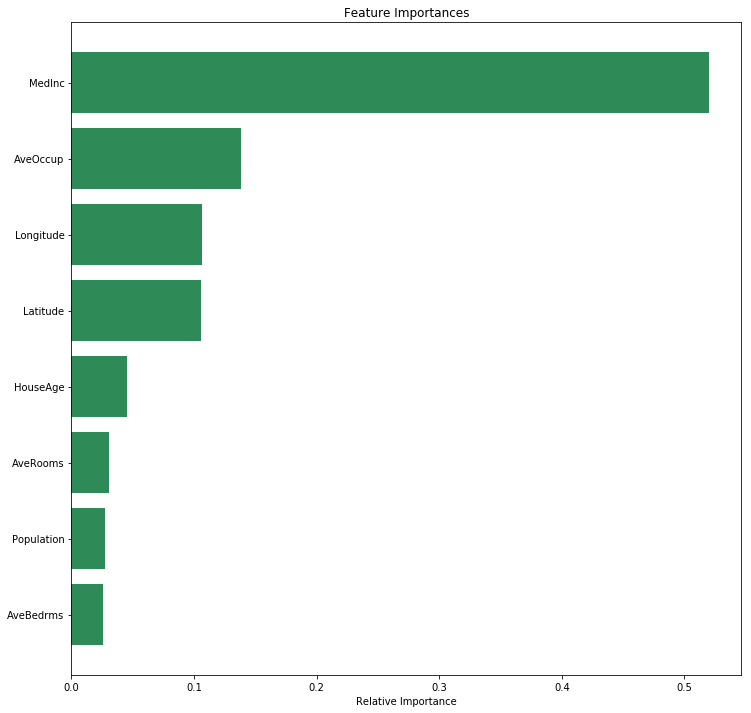

In [44]:
# plot the variable importance
import matplotlib.pyplot as plt
%matplotlib inline
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='seagreen', align='center')
plt.yticks(range(len(indices)),np.array(dataset.feature_names)[indices])
plt.xlabel('Relative Importance');

In [45]:
selector = SelectFromModel(clf, prefit=True, threshold='median')
# threshold is set to 'median', which is the median of the variable importances
# which is around 0.0763
# we can also set the max_features parameters to select the top features

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[0,5,6,7]]) 
# select the 1st, 6th, 7th and 8th features
assert np.array_equal(transformed_test, test_set[:,[0,5,6,7]]) 